In [2]:
import json
import glob, pickle

import numpy as np
import pandas as pd

from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use({'figure.facecolor':'white'})

In [3]:
with open('./train_lima_test_montreal.pk', 'rb') as in_file:
    dfs = pickle.load(in_file)

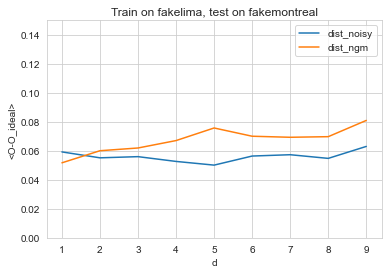

In [6]:
plt.style.use({'figure.facecolor':'white'})

y_dist_noisy = []
y_dist_ngm = []
for depth in dfs.keys():
    y_dist_noisy.append(dfs[depth]['dist_noisy'].mean())
    y_dist_ngm.append(dfs[depth]['dist_ngm'].mean())

plt.plot(np.arange(1, 10), y_dist_noisy, label='dist_noisy')
plt.plot(np.arange(1, 10), y_dist_ngm, label='dist_ngm')
plt.ylim([0, 0.15])
plt.title('Train on fakelima, test on fakemontreal')
plt.ylabel('<O-O_ideal>')
plt.xlabel('d')
plt.legend()
plt.show()